[ZHAW Link Kurs](https://github.com/toelt-llc/COURSE-zhaw-dlcourse-spring2019?tab=readme-ov-file)


Week 1 Intro Math & Python

[IQ Dataset](https://online.stat.psu.edu/stat462/node/129/#:~:text=This%20tells%20us%20that%2029.49,brain%20size%2C%20height%20and%20weight.)

In [4]:

from google.colab import drive
import pandas as pd
drive.mount('/content/drive/', force_remount=True)
data = pd.read_csv("/content/drive/My Drive/COURSE-zhaw-dlcourse-spring2019/iqsize.txt", sep = '\t')

Mounted at /content/drive/


In [5]:
data.head()

,PIQ,Brain,Height,Weight
0,124,81.69,64.5,118
1,150,103.84,73.3,143
2,128,96.54,68.8,172
3,134,95.15,65.0,147
4,110,92.88,69.0,146


In [6]:
data.size

152

In [8]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

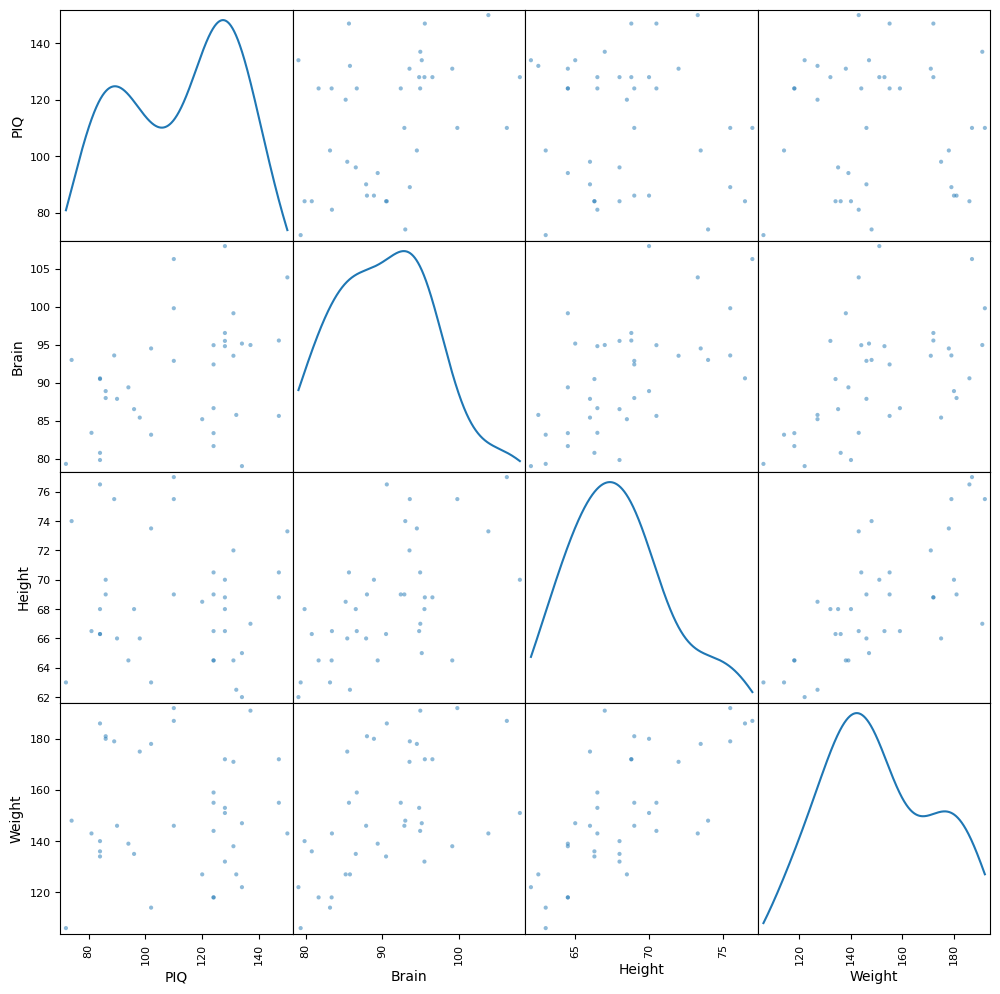

In [9]:
scatter_matrix(data, alpha = 0.5, figsize = (12, 12), diagonal = 'kde');

In [10]:
Y = data["PIQ"]

In [11]:
Y.head()

0    124
1    150
2    128
3    134
4    110
Name: PIQ, dtype: int64

In [12]:
X = data.drop("PIQ", axis = 1)

In [13]:
X.head()

,Brain,Height,Weight
0,81.69,64.5,118
1,103.84,73.3,143
2,96.54,68.8,172
3,95.15,65.0,147
4,92.88,69.0,146


In [14]:
X["b"] = 1

In [15]:
X.head()

,Brain,Height,Weight,b
0,81.69,64.5,118,1
1,103.84,73.3,143,1
2,96.54,68.8,172,1
3,95.15,65.0,147,1
4,92.88,69.0,146,1


In [16]:
cols = X.columns.tolist()
cols = cols[-1:] + cols[:-1]
print(cols)

['b', 'Brain', 'Height', 'Weight']


In [17]:
X = X[cols]

In [ ]:
X.head()

In [19]:
part1 = np.linalg.inv(np.matmul(X.transpose() , X))
part2 = np.matmul(X.transpose(), Y)

p = np.matmul(part1, part2)

<ipython-input-19-6b70ba332bb5>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  part1 = np.linalg.inv(np.matmul(X.transpose() , X))


In [20]:
print(p)

[ 1.11353608e+02  2.06036680e+00 -2.73192916e+00  5.59937127e-04]


In [21]:
Yhat = np.matmul(X, p)

Text(0, 0.5, 'Predicted Target Value')

<Figure size 640x480 with 0 Axes>

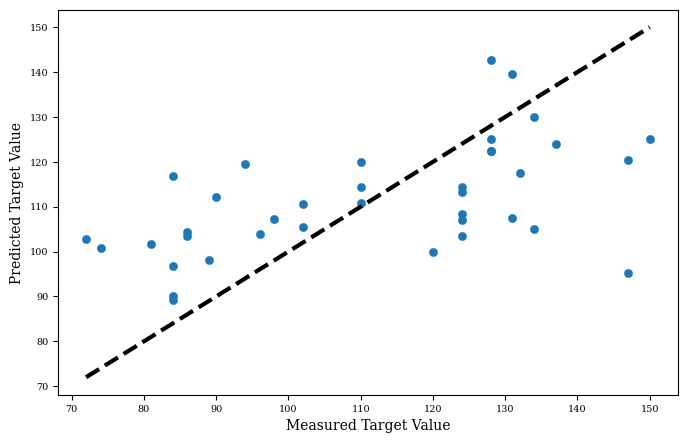

In [26]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.tight_layout()

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(Y, Yhat, lw = 0.3)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw = 3)
ax.set_xlabel('Measured Target Value')
ax.set_ylabel('Predicted Target Value')

In [60]:
# output
#p = [ 1.11353608e+02  2.06036680e+00 -2.73192916e+00  5.59937127e-04]
print(p)
# b, brainsize MRI, tallness in inches, weight in pounds
X2 = [1,100,70,227]
iq = np.matmul(X2, p)
iq2 = 1.11353608e+02 + (2.06036680e+00 * 100 ) + (-2.73192916e+00 * 70) + (5.59937127e-04 * 227)
print(iq)
print(iq2)

[ 1.11353608e+02  2.06036680e+00 -2.73192916e+00  5.59937127e-04]
126.28235243762799
126.28235252782899


Example of linear regression in sklearn

In [70]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
X = data.drop("PIQ", axis = 1)
X["b"] = 1

regr = linear_model.LinearRegression()
regr.fit(X.drop('b', axis = 1), Y)


LinearRegression()

In [71]:
y_pred = regr.predict(X.drop('b', axis = 1))

In [72]:
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [ 2.06036680e+00 -2.73192916e+00  5.59937127e-04]
Intercept:  111.35360829241695


In [77]:
print('Coefficients from the matrix model: ', p[1:4])
print('Coefficients obtained with sklearn: ', regr.coef_)
print('Intercept obtained with sklearn: ', p[0])
print('Intercept obtained with sklearn: ', regr.intercept_)

Coefficients from the matrix model:  [ 2.06036680e+00 -2.73192916e+00  5.59937127e-04]
Coefficients obtained with sklearn:  [ 2.06036680e+00 -2.73192916e+00  5.59937127e-04]
Intercept obtained with sklearn:  111.35360829237379
Intercept obtained with sklearn:  111.35360829241695


Text(0, 0.5, 'Predicted Target Value')

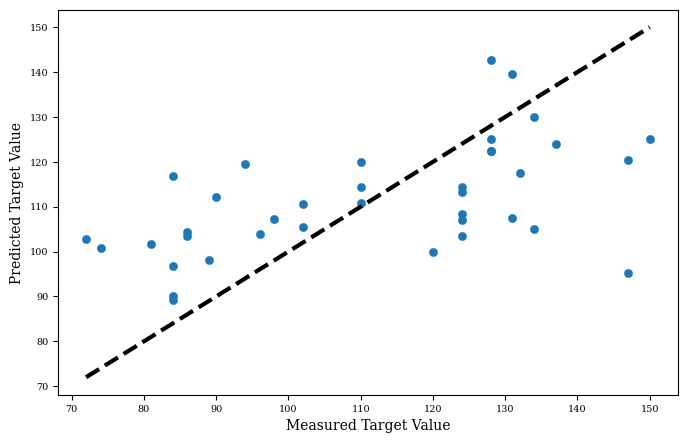

In [74]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(Y, y_pred, lw = 0.3)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw = 3)
ax.set_xlabel('Measured Target Value')
ax.set_ylabel('Predicted Target Value')

In [112]:
new_element = regr.intercept_
coeff_matrix = np.insert(regr.coef_, 0, new_element)
iq = np.matmul(X2, coeff_matrix)
print(iq)

126.28235243763876
